<a href="https://colab.research.google.com/github/rachocr/CCADMACL_EXERCISES_COM222ML/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Use all feature selection methods to find the best features

## Dataset Information

## Features

Number of Instances: 20640

Number of Attributes: 8 numeric, predictive attributes and the target

Attribute Information:

MedInc - median income in block group

HouseAge - median house age in block group

AveRooms - average number of rooms per household

AveBedrms - average number of bedrooms per household

Population - block group population

AveOccup - average number of household members

Latitude - block group latitude

Longitude - block group longitude

## Target
The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

In [93]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [94]:
housing = fetch_california_housing(as_frame=True)
df = pd.concat([housing.data, housing.target], axis=1)

1. Use any filter method to select the best features

##Mutual_info_classif

In [101]:
from sklearn.feature_selection import mutual_info_regression

X = housing.data
y = housing.target

threshold = 5
high_score_features = []
feature_scores = mutual_info_regression(X, y, random_state=0)

print("Best Features:\n")
for score, f_name in sorted(zip(feature_scores, X.columns), reverse=True)[:threshold]:
    print(f"{f_name}: {score}")
    high_score_features.append(f_name)

X_high_score = X[high_score_features]

X_train, X_test, y_train, y_test = train_test_split(X_high_score, y, test_size=0.2, random_state=42)

model = Ridge()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nRMSE on test data: {rmse}")

Best Features:

Longitude: 0.4018195828289901
MedInc: 0.38764599736258987
Latitude: 0.3706566756286751
AveRooms: 0.10362300978707584
AveOccup: 0.07254907984228254

RMSE on test data: 0.747795071207304


2. Use any wrapper method to select the best features

##Recursive Feature Elimination

Best number of features: 6


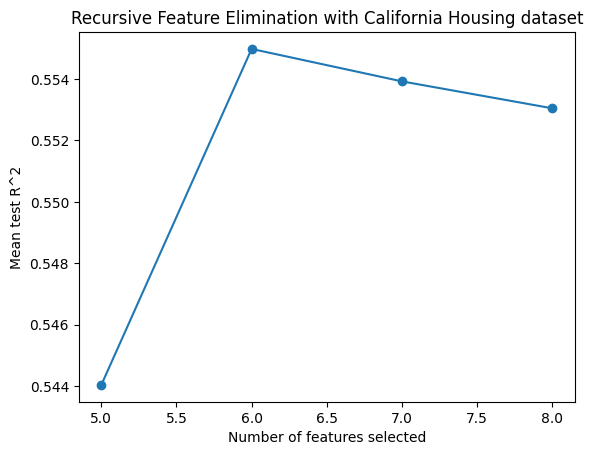


Best features selected:
MedInc
HouseAge
AveRooms
AveBedrms
Latitude
Longitude

RMSE on test data: 0.7462419626677662


In [96]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

min_features_to_select = 5
model = Ridge()
cv = KFold(5)

rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring="r2",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Best number of features: {rfecv.n_features_}")

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test R^2")
mean_test_scores = rfecv.cv_results_['mean_test_score']
n_features = range(min_features_to_select, len(mean_test_scores) + min_features_to_select)
plt.plot(n_features, mean_test_scores, marker='o')
plt.title("Recursive Feature Elimination with California Housing dataset")
plt.show()

best_features = X.columns[rfecv.support_]
print("\nBest features selected:")
for feature in best_features:
    print(feature)

X_selected = X[best_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nRMSE on test data: {rmse}")

3. Use any embedded methood to select the best features

##Random Forest


In [104]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = housing.data
y = housing.target

forest_model = RandomForestRegressor(random_state=0).fit(X, y)

forest_feature_importance = pd.Series(forest_model.feature_importances_, index=X.columns)

top_forest_features = forest_feature_importance.sort_values(ascending=False).head(5)
print("Best Features from Random Forest:\n")
print(top_forest_features)

X_selected_forest = X[top_forest_features.index]

X_train, X_test, y_train, y_test = train_test_split(X_selected_forest, y, test_size=0.2, random_state=42)

forest_model.fit(X_train, y_train)

y_pred = forest_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print RMSE
print(f"\nRMSE on test data: {rmse}")


Best Features from Random Forest:

MedInc       0.520642
AveOccup     0.136854
Latitude     0.092836
Longitude    0.091147
HouseAge     0.052878
dtype: float64

RMSE on test data: 0.5100220294476064


##Comparison

In [105]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse_default = np.sqrt(mse)

print(f"RMSE for Default Model (All Features): {rmse_default}")


RMSE for Default Model (All Features): 0.7455222779992702
